In [5]:
import json
import matplotlib.pyplot as plt

In [29]:
class Triple():

    def __init__(self, subject, predicate, object):
        self.subject = subject
        self.predicate = predicate
        self.object = object

    def __hash__(self):
        """Should only check on S, P, O, but not other variables"""
        return hash((self.subject, self.predicate, self.object))

    def setObjectBox(self, oxmin, oymin, oxmax, oymax):
        self.obox = (oxmin, oymin, oxmax, oymax)

    def setSubjectBox(self, sxmin, symin, sxmax, symax):
        self.sbox = (sxmin, symin, sxmax, symax)

def read_triples_diff(graph_path):
    """
    Complete import of a graph.
    """
    triples_read = set()
    with open(graph_path, "r") as file:
        triples = json.load(file)
        file.close()

    for triple_dict in triples:
        subject = triple_dict["subject"]
        predicate = triple_dict["predicate"]
        object = triple_dict["object"]
        triple = Triple(subject["id"], predicate["id"], object["id"])
        triple.setSubjectBox(subject["xmin"], subject["ymin"], subject["xmax"], subject["ymax"])
        triple.setObjectBox(object["xmin"], object["ymin"], object["xmax"], object["ymax"])
        triples_read.add(triple)

    return triples_read

triples_read = read_triples_diff("graph.json")
triples = list(triples_read)[0:3]

/var/folders/42/1rd276pd4xz3mx5277jqb3vw0000gn/T/ipykernel_790/3675004701.py:19: MatplotlibDeprecationWarning: Passing argument *p* of unexpected type Line2D to add_patch which only accepts <class 'matplotlib.patches.Patch'> is deprecated since 3.5 and will become an error two minor releases later.
  ax.add_patch(plt.Line2D((sxcentre, sycentre), (oxcentre, oycentre), color="red"))


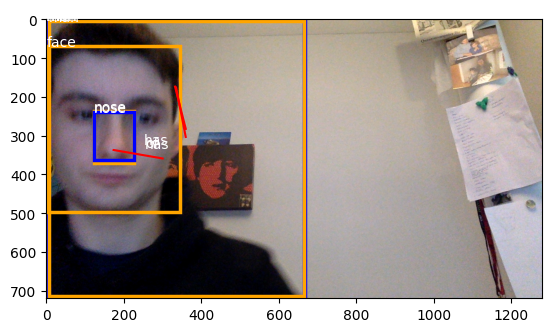

In [40]:
fig, ax = plt.subplots()
im = plt.imread("snap.png")
ax.imshow(im)
for triple in triples:
    (oxmin, oymin, oxmax, oymax) = triple.obox
    (sxmin, symin, sxmax, symax) = triple.sbox
    oxcentre = oxmin + (oxmax-oxmin)/2
    oycentre = oymin + (oymax-oymin)/2
    sxcentre = sxmin + (sxmax-sxmin)/2
    sycentre = symin + (symax-symin)/2
    xlinecentre = oxcentre + (sxcentre-oxcentre)/2
    ylinecentre = oycentre + (sycentre-oycentre)/2
    ax.add_patch(plt.Rectangle((sxmin, symin), sxmax - sxmin, symax - symin,
                               fill=False, color='blue', linewidth=2.5))
    ax.add_patch(plt.Rectangle((oxmin, oymin), oxmax - oxmin, oymax - oymin,
                               fill=False, color='orange', linewidth=2.5))
    ax.annotate(triple.subject, (sxmin, symin), color="white")
    ax.annotate(triple.object, (oxmin, oymin), color="white")
    ax.add_patch(plt.Line2D((sxcentre, sycentre), (oxcentre, oycentre), color="red"))
    ax.annotate(triple.predicate, (xlinecentre, ylinecentre), color="white")
plt.show()